In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1630


<Axes: xlabel='Time'>

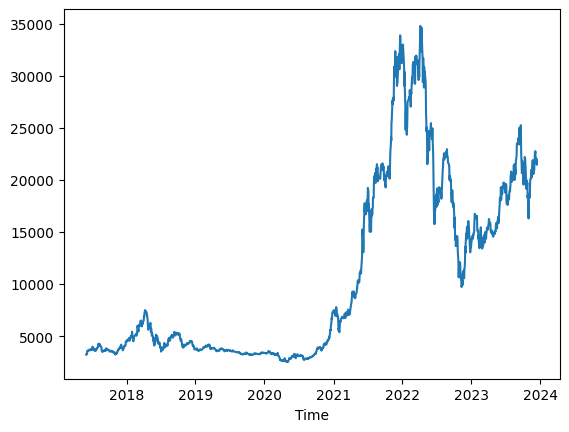

In [2]:
#2. Fetch data and visualize
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
VND
VND["Close"].plot()

In [3]:
VND['Lag'] = np.arange(len(VND.index))
VND = VND[['Close', 'Lag']]
VND

VND = pd.DataFrame(VND)
VND.set_index("Lag", inplace= True)
VND

,Close
Lag,
0,3230
1,3280
2,3280
3,3320
4,3590
...,...
1625,21950
1626,22050
1627,21600


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.8 * len(VND))
test_size = int(0.2 * len(VND))

train_data = VND[:train_size]
test_data = VND[train_size:]

In [5]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[20281.73505808],
       [20298.97477732],
       [20316.21449656],
       [20333.45421581],
       [20350.69393505],
       [20367.9336543 ],
       [20385.17337354],
       [20402.41309278],
       [20419.65281203],
       [20436.89253127],
       [20454.13225051],
       [20471.37196976],
       [20488.611689  ],
       [20505.85140825],
       [20523.09112749],
       [20540.33084673],
       [20557.57056598],
       [20574.81028522],
       [20592.05000446],
       [20609.28972371],
       [20626.52944295],
       [20643.7691622 ],
       [20661.00888144],
       [20678.24860068],
       [20695.48831993],
       [20712.72803917],
       [20729.96775841],
       [20747.20747766],
       [20764.4471969 ],
       [20781.68691615],
       [20798.92663539],
       [20816.16635463],
       [20833.40607388],
       [20850.64579312],
       [20867.88551236],
       [20885.12523161],
       [20902.36495085],
       [20919.6046701 ],
       [20936.84438934],
       [20954.08410858],


In [7]:
# 6. 60 days prediction
last_index =  VND.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[25901.88353154]
 [25919.12325078]
 [25936.36297003]
 [25953.60268927]
 [25970.84240851]
 [25988.08212776]
 [26005.321847  ]
 [26022.56156624]
 [26039.80128549]
 [26057.04100473]
 [26074.28072398]
 [26091.52044322]
 [26108.76016246]
 [26125.99988171]
 [26143.23960095]
 [26160.47932019]
 [26177.71903944]
 [26194.95875868]
 [26212.19847793]
 [26229.43819717]
 [26246.67791641]
 [26263.91763566]
 [26281.1573549 ]
 [26298.39707414]
 [26315.63679339]
 [26332.87651263]
 [26350.11623188]
 [26367.35595112]
 [26384.59567036]
 [26401.83538961]
 [26419.07510885]
 [26436.31482809]
 [26453.55454734]
 [26470.79426658]
 [26488.03398583]
 [26505.27370507]
 [26522.51342431]
 [26539.75314356]
 [26556.9928628 ]
 [26574.23258204]
 [26591.47230129]
 [26608.71202053]
 [26625.95173978]
 [26643.19145902]
 [26660.43117826]
 [26677.67089751]
 [26694.91061675]
 [26712.15033599]
 [26729.39005524]
 [26746.62977448]
 [26763.86949373]
 [26781.10921297]
 [26798.34893221]

In [10]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 6363.112439147606
Testing MAPE: 38.24133113640786
Testing MAE: 5845.90426887209
MSLR:  0.12302408760415506


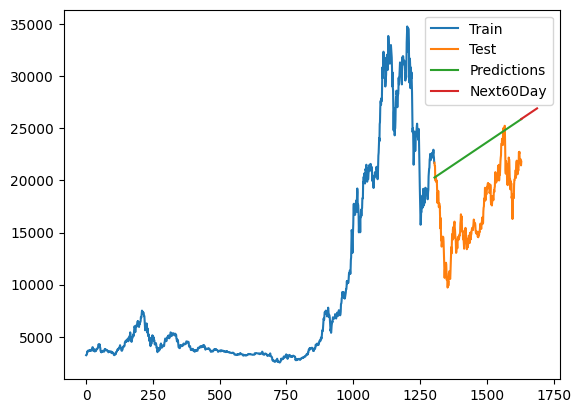

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()